# Problem statement
Example 4.1 - Reinforcement Learning: An Introduction, Sutton and Barto, Second Edition - Dynamic Programming

The agent at each step has 4 possible actions including up, down, left and right. The terminal states are top left and bottom right with 0 reward. Every other step leads to a -1 reward.

            T  o  o  o
            o  x  o  o
            o  o  o  o
            o  o  o  T

In this notebook, we evaluate the random policy. A gym-compatible env is used for the simulation of the environment.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

if "../" not in sys.path:
  sys.path.append("../") 


from envs.gridworld import GridworldEnv

In [2]:
env = GridworldEnv()

In [3]:
def policy_evaluation(policy, env, discount_factor=1.0, convergence_criterion=1e-4):
    """
    Evaluates a policy, given an environment and full description of the environment's dynamics
    
    @policy: map of [state, action] representing the policy
    @env: OpenAI environment
          env.P: transition probabilities of the environment
          env.P[state][action]: list of transition tuples (prob, next_state, reward, done).
          env.nS: number of states in the environment 
          env.nA is a number of actions in the environment.
    @convergence_criterion: iterations convergence criterion for all the state values
    @discount_factor: Gamma discount factor
    
    Returns:
        value: vector of length env.nS representing the value function
    """
    # Initialize the value function
    value = np.zeros(env.nS)
    while True:
        delta_value = 0
        for state in range(env.nS):
            expected_value = 0
            # Look at the possible next actions
            for action, action_prob in enumerate(policy[state]):
                # Look at the possible next state for each action
                for  state_prob, next_state, reward, done in env.P[state][action]:
                    # Calculate the expected value
                    expected_value += action_prob * state_prob * (reward + discount_factor * value[next_state])
            # How much our value function changed (across any states)
            delta_value = max(delta_value, np.abs(expected_value - value[state]))
            value[state] = expected_value
        # Check for value function convergence
        if delta_value < convergence_criterion:
            break
    return np.array(value)

In [4]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
value = policy_evaluation(random_policy, env)

In [5]:
print(value)

[  0.         -13.99931242 -19.99901152 -21.99891199 -13.99931242
 -17.99915625 -19.99908389 -19.99909436 -19.99901152 -19.99908389
 -17.99922697 -13.99942284 -21.99891199 -19.99909436 -13.99942284
   0.        ]


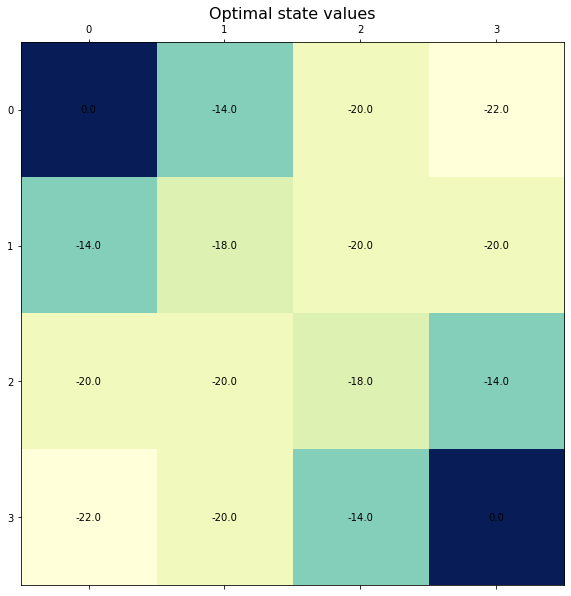

In [6]:
data = value.reshape(env.shape)

fig, ax = plt.subplots(figsize=(12,10))
ax.matshow(data, cmap='YlGnBu')
for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_title('Optimal state values', fontsize=16)
plt.show()